# FINAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load clean data
rates = pd.read_csv('inputs/Clean_Data/Clean_Rates.csv')
sp500_ret = pd.read_csv('inputs/Clean_Data/Clean_sp500_ret.csv')
stock_tv = pd.read_csv('inputs/Clean_Data/Clean_stock_tv.csv')
Vbilx = pd.read_csv('inputs/Clean_Data/Clean_Vbilx.csv')
Vbirx= pd.read_csv('inputs/Clean_Data/Clean_Vbirx.csv')

## Merging data 

In [3]:
# Set date column as index in each dataset
Vbilx.set_index('Date', inplace=True)
Vbirx.set_index('Date', inplace=True)
sp500_ret.set_index('date', inplace=True)

# Merge datasets 
merged_data = pd.concat([Vbilx['Daily Price'],Vbilx['Daily Returns'], Vbirx['Daily Price'], Vbirx['Daily Returns'], sp500_ret['S&P_500']], axis=1, keys=['VBILX Price','VBILX Returns', 'VBIRX Price', 'VBIRX Returns', 'S&P 500'])
merged_data.reset_index(inplace=True)
merged_data = merged_data.rename(columns={'index':'Date'})

In [4]:
merged_data.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,S&P 500
0,2015-01-05,9.135242,0.004348,9.157207,0.000953,2020.58
1,2015-01-06,9.174788,0.004329,9.165928,0.000952,2002.61
2,2015-01-07,9.174788,0.000000,9.174649,0.000951,2025.90
3,2015-01-08,9.151064,-0.002586,9.165928,-0.000951,2062.14
4,2015-01-09,9.182693,0.003456,9.183370,0.001903,2044.81


## Merge for FOMC Meeting days

In [5]:
filtered_dates = rates['Date'].tolist()
merged_data_filtered = merged_data[merged_data['Date'].isin(filtered_dates)]

In [6]:
Data_with_rates = pd.merge(merged_data_filtered, rates, on='Date', how='left')

In [7]:
Data_with_rates  = Data_with_rates .rename(columns={'Increase': 'rates increase', 'Decrease': 'rates decrease', 'Tgt_level': 'rates Tgt_level'})
Data_with_rates.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,S&P 500,rates increase,rates decrease,rates Tgt_level
0,2015-12-17,9.178915,0.003546,9.217262,0.000000,2041.89,25.0,0.0,0.25.0.50
1,2016-12-15,9.314663,-0.002681,9.303717,-0.000963,2262.03,25.0,0.0,0.50.0.75
2,2017-03-16,9.455320,-0.001781,9.369159,-0.000959,2381.38,25.0,0.0,0.75.1.00
3,2017-06-15,9.772592,-0.001734,9.448401,-0.000954,2432.46,25.0,0.0,1.00.1.25
4,2017-12-14,9.808611,-0.000876,9.456396,-0.000962,2652.01,25.0,0.0,1.25.1.50


## Correlation matrix 

/var/folders/_c/n4fjhrcn45bfs76s3p_8hn2c0000gn/T/ipykernel_25163/3694812839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data_with_rates.corr()


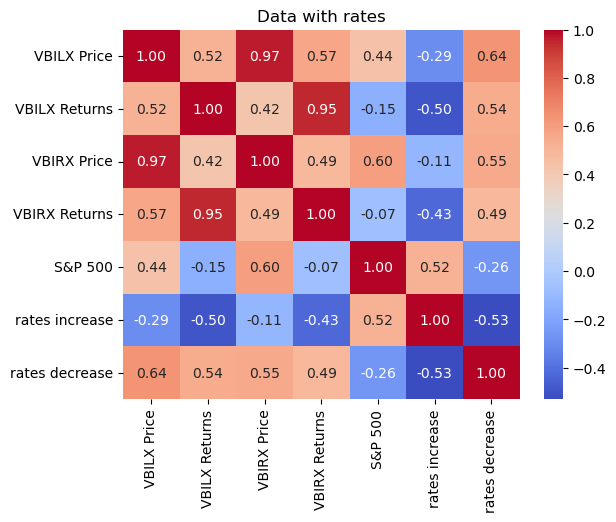

In [8]:
corr_matrix = Data_with_rates.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Data with rates')
plt.show()

## T+15 / T-15 FOMC Meetings

In [13]:
fifteen_days = pd.DataFrame()
filtered_dates = rates['Date'].tolist()
rates['Date'] = pd.to_datetime(rates['Date'])

# Loop 
for date in filtered_dates:
    # Convert date to datetime object
    match_date = pd.to_datetime(date)
    # Filter the merged data to the 15 days prior and after the matching date
    prior_15 = merged_data.loc[(merged_data['Date'] >= match_date - pd.Timedelta(days=15)) & (merged_data['Date'] <= match_date)]
    post_15 = merged_data.loc[(merged_data['Date'] > match_date) & (merged_data['Date'] <= match_date + pd.Timedelta(days=15))]
    # Combine the filtered dataframes and append to the results dataframe
    filtered_data = pd.concat([prior_15, post_15])
    fifteen_days = pd.concat([fifteen_days, filtered_data])

# Sort results and drop and duplicates
fifteen_days.sort_values(by='Date', inplace=True)
fifteen_days.drop_duplicates(inplace=True)
fifteen_days

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

### Data Sources

- FOMC Rates 
        Source:https://www.federalreserve.gov/monetarypolicy/openmarket.htm
        
- Index Returns
    Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview
    
- Stock Trading Volume¶
  Source: https://ycharts.com/indicators/cboe_spx_volume
  
- VBLAX data 
    Source: Yahoo Finance (import yfinance as yf)
    
- VBIRX data 
    Source: Yahoo Finance (import yfinance as yf)